In [ ]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV,cross_val_score,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import  accuracy_score, roc_curve, auc ,confusion_matrix, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder


from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [ ]:
df=pd.read_csv('/content/train.csv')

# **Exploratory Data Analysis (EDA)**

In [ ]:
df.head(10)

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
5,24368,38,Female,3,Technology,9977,Fair,High,Below Average,3,...,0,Mid,Medium,47,No,No,Yes,Fair,High,Left
6,64970,47,Male,23,Education,3681,Fair,High,High,1,...,3,Entry,Small,93,No,No,No,Good,Medium,Left
7,36999,48,Male,16,Finance,11223,Excellent,Very High,High,2,...,4,Entry,Medium,88,No,No,No,Excellent,Low,Stayed
8,32714,57,Male,44,Education,3773,Good,Medium,High,1,...,4,Entry,Medium,75,No,No,No,Fair,Medium,Stayed
9,15944,24,Female,1,Healthcare,7319,Poor,High,Average,1,...,4,Entry,Large,45,No,No,Yes,Good,Low,Left


In [ ]:
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [ ]:
df.drop('Employee ID',axis=1,inplace=True)

In [ ]:
df.info()         # Check data types and basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       59598 non-null  int64 
 1   Gender                    59598 non-null  object
 2   Years at Company          59598 non-null  int64 
 3   Job Role                  59598 non-null  object
 4   Monthly Income            59598 non-null  int64 
 5   Work-Life Balance         59598 non-null  object
 6   Job Satisfaction          59598 non-null  object
 7   Performance Rating        59598 non-null  object
 8   Number of Promotions      59598 non-null  int64 
 9   Overtime                  59598 non-null  object
 10  Distance from Home        59598 non-null  int64 
 11  Education Level           59598 non-null  object
 12  Marital Status            59598 non-null  object
 13  Number of Dependents      59598 non-null  int64 
 14  Job Level             

In [ ]:
df.isnull().sum()  #Check for missing values

,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,0
Overtime,0


In [ ]:
unique_values = df.nunique() #ckeck unique values
print(unique_values)

Age                           42
Gender                         2
Years at Company              51
Job Role                       5
Monthly Income              9569
Work-Life Balance              4
Job Satisfaction               4
Performance Rating             4
Number of Promotions           5
Overtime                       2
Distance from Home            99
Education Level                5
Marital Status                 3
Number of Dependents           7
Job Level                      3
Company Size                   3
Company Tenure               127
Remote Work                    2
Leadership Opportunities       2
Innovation Opportunities       2
Company Reputation             4
Employee Recognition           4
Attrition                      2
dtype: int64


In [ ]:
df['Attrition'].value_counts()

,count
Attrition,
Stayed,31260
Left,28338


In [ ]:
df.describe()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,38.565875,15.753901,7302.397983,0.832578,50.007651,1.648075,55.758415
std,12.079673,11.245981,2151.457423,0.994991,28.466459,1.555689,25.411090
min,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000,2.000000
25%,28.000000,7.000000,5658.000000,0.000000,25.000000,0.000000,36.000000
50%,39.000000,13.000000,7354.000000,1.000000,50.000000,1.000000,56.000000
75%,49.000000,23.000000,8880.000000,2.000000,75.000000,3.000000,76.000000
max,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


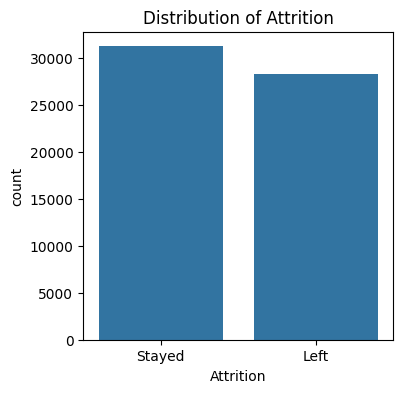

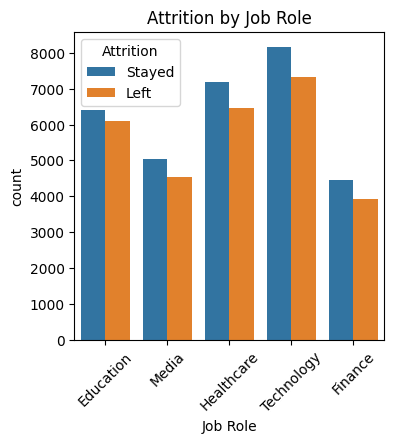

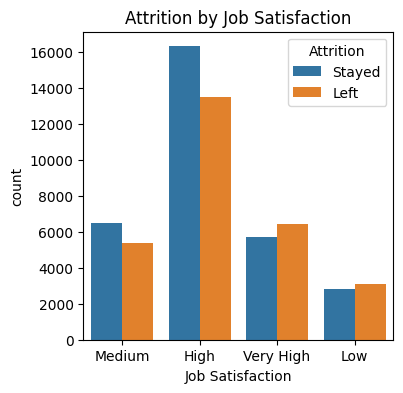

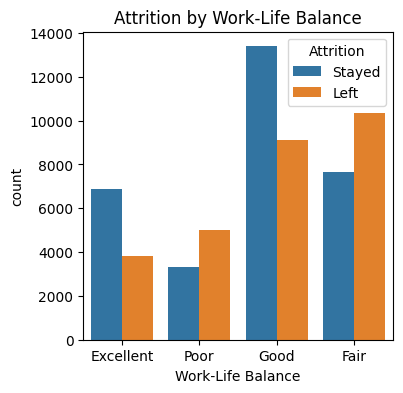

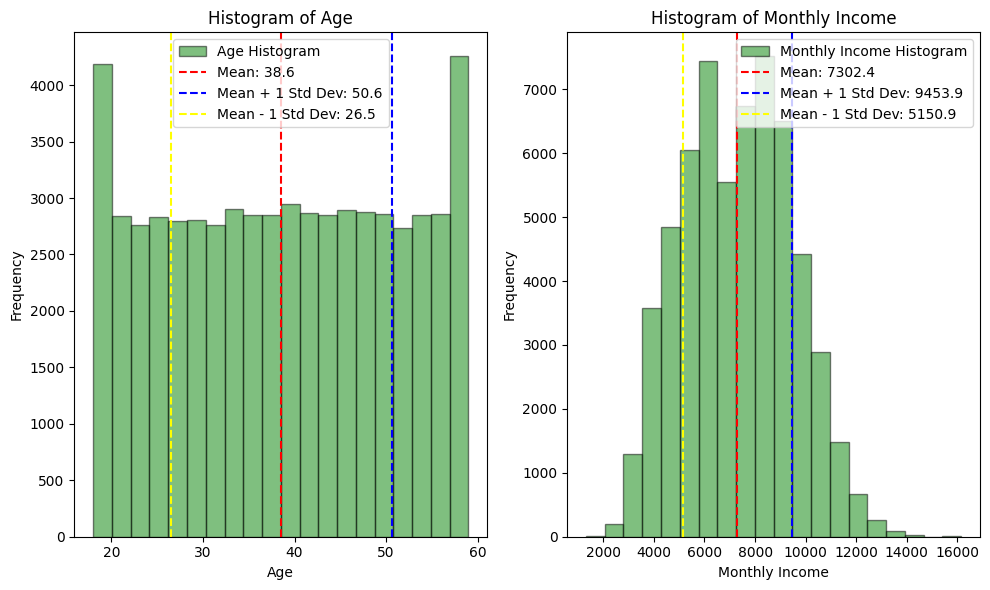

In [ ]:
# Plot the distribution of Attrition
plt.figure(figsize=(4, 4))
sns.countplot(x='Attrition', data=df)
plt.title('Distribution of Attrition')
plt.show()

# Plot Attrition by Job Role
plt.figure(figsize=(4, 4))
sns.countplot(x='Job Role', hue='Attrition', data=df)
plt.title('Attrition by Job Role')
plt.xticks(rotation=45)
plt.show()

# Plot Attrition by Job Satisfaction
plt.figure(figsize=(4, 4))
sns.countplot(x='Job Satisfaction', hue='Attrition', data=df)
plt.title('Attrition by Job Satisfaction')
plt.show()

# Plot Attrition by Work-Life Balance
plt.figure(figsize=(4, 4))
sns.countplot(x='Work-Life Balance', hue='Attrition', data=df)
plt.title('Attrition by Work-Life Balance')
plt.show()


# Create a figure with two subplots
plt.figure(figsize=(10, 6))

# Plot for Age
plt.subplot(1, 2, 1)
plt.hist(df['Age'], bins=20, color='green', alpha=0.5, label='Age Histogram', edgecolor='black')
mean_age = df['Age'].mean()
std_age = df['Age'].std()
plt.axvline(mean_age, color='red', linestyle='--', label=f'Mean: {mean_age:.1f}')
plt.axvline(mean_age + std_age, color='blue', linestyle='--', label=f'Mean + 1 Std Dev: {mean_age + std_age:.1f}')
plt.axvline(mean_age - std_age, color='yellow', linestyle='--', label=f'Mean - 1 Std Dev: {mean_age - std_age:.1f}')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# Plot for Monthly Income
plt.subplot(1, 2, 2)
plt.hist(df['Monthly Income'], bins=20, color='green', alpha=0.5, label='Monthly Income Histogram', edgecolor='black')
mean_income = df['Monthly Income'].mean()
std_income = df['Monthly Income'].std()
plt.axvline(mean_income, color='red', linestyle='--', label=f'Mean: {mean_income:.1f}')
plt.axvline(mean_income + std_income, color='blue', linestyle='--', label=f'Mean + 1 Std Dev: {mean_income + std_income:.1f}')
plt.axvline(mean_income - std_income, color='yellow', linestyle='--', label=f'Mean - 1 Std Dev: {mean_income - std_income:.1f}')
plt.title('Histogram of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()





# **-preprocessing ( scaling, encoding)**
# **-split the Dataset into train and test sets**


In [ ]:
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Left' else -1) #Convert coulmn ' Attrition' into 1=left , -1=stayed

In [ ]:
# Define the columns to be label encoded
label_cols = ['Gender', 'Job Role', 'Overtime', 'Education Level', 'Marital Status', 'Job Level',
              'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
              'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
              'Company Reputation', 'Employee Recognition']

# Initialize label encoders
label_encoders = {col: LabelEncoder() for col in label_cols}

# Apply label encoding
for col in label_cols:
    df[col] = label_encoders[col].fit_transform(df[col])


In [ ]:
x = df.drop(columns=['Attrition'])
y = df['Attrition']

# Split into training and test sets (60% train, 40% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, stratify=y, random_state=42)

# Check the shapes of the resulting sets
print(x_train.shape, x_test.shape)

(35758, 22) (23840, 22)


In [ ]:
#data normaiztion
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

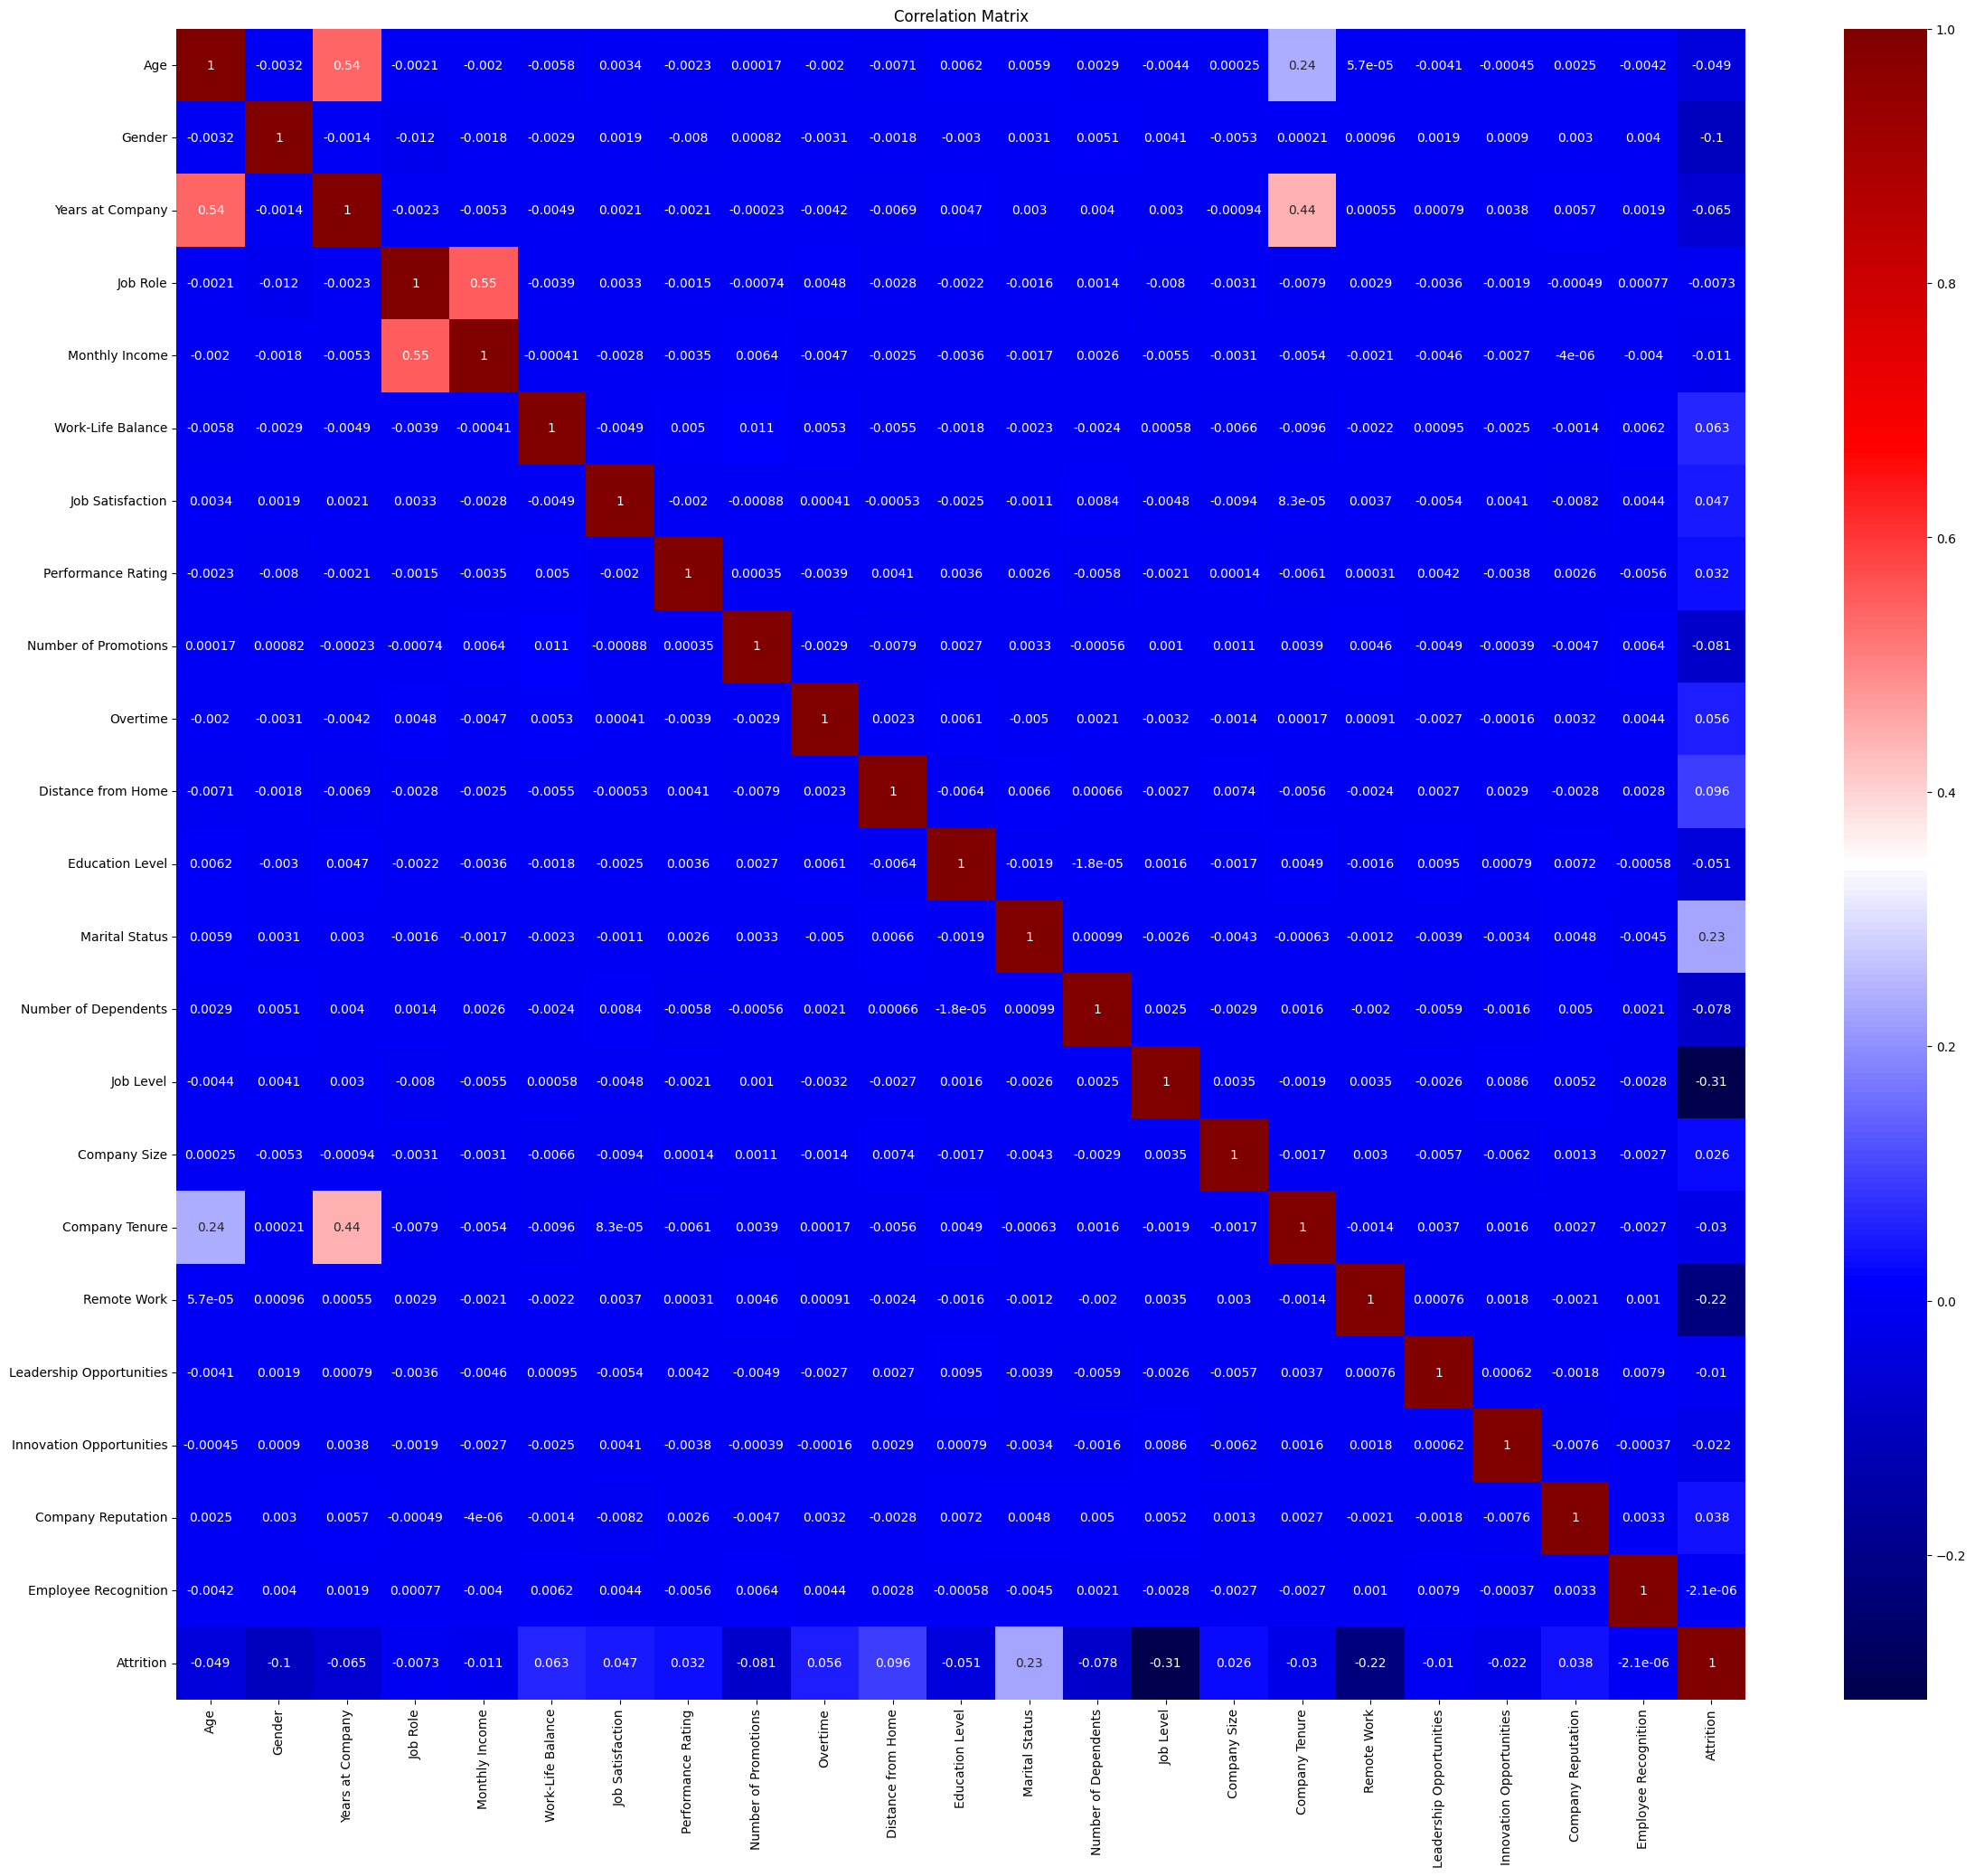

In [ ]:
# Correlation matrix
plt.figure(figsize=(28, 24))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='seismic')
plt.title('Correlation Matrix')
plt.show()

# **Building Adaboost Classifier**

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

adb_model = AdaBoostClassifier(random_state=42, learning_rate=1.0, n_estimators=50)# the default hyperparameters
adb_model.fit(x_train, y_train)


for i in range(1, adb_model.n_estimators + 1):
    # Getting the error rate for each weak learner
    adb_model.n_estimators = i
    adb_model.fit(x_train, y_train)
    error = 1 - adb_model.score(x_train, y_train)
    print(f"Weak Learner {i}: Error Rate = {error:.6f}")

Weak Learner 1: Error Rate = 0.358969
Weak Learner 2: Error Rate = 0.339840
Weak Learner 3: Error Rate = 0.345321
Weak Learner 4: Error Rate = 0.296269
Weak Learner 5: Error Rate = 0.290313
Weak Learner 6: Error Rate = 0.288663
Weak Learner 7: Error Rate = 0.293920
Weak Learner 8: Error Rate = 0.276162
Weak Learner 9: Error Rate = 0.274428
Weak Learner 10: Error Rate = 0.269199
Weak Learner 11: Error Rate = 0.265339
Weak Learner 12: Error Rate = 0.261312
Weak Learner 13: Error Rate = 0.257509
Weak Learner 14: Error Rate = 0.248140
Weak Learner 15: Error Rate = 0.253258
Weak Learner 16: Error Rate = 0.251356
Weak Learner 17: Error Rate = 0.246994
Weak Learner 18: Error Rate = 0.246966
Weak Learner 19: Error Rate = 0.245931
Weak Learner 20: Error Rate = 0.245679
Weak Learner 21: Error Rate = 0.245428
Weak Learner 22: Error Rate = 0.244896
Weak Learner 23: Error Rate = 0.244337
Weak Learner 24: Error Rate = 0.243246
Weak Learner 25: Error Rate = 0.242631
Weak Learner 26: Error Rate = 0.24

Test the model on the test set and show the metrics.



Confusion Matrix for AdaBoostClassifier:
[[9637 2867]
 [2949 8387]]


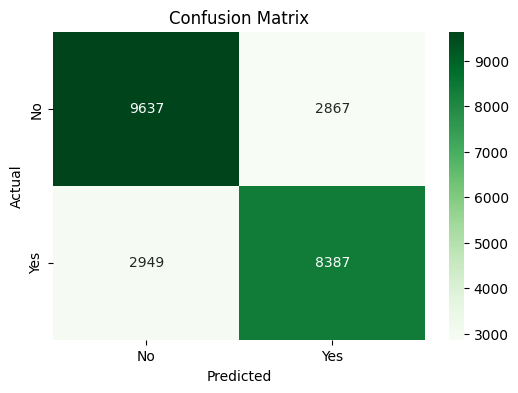

accuracy, Precision, Recall, F-score,for Attrition with Default hyperparameters:
Accuracy: 0.75604026845638
Precision: 0.74524613470766
Recall: 0.73985532815808
F-score: 0.74254094732182


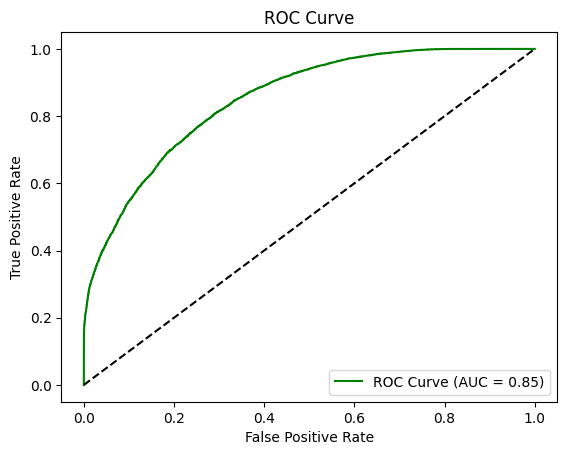

In [ ]:
# Make predictions on the test set
y_predict_test = adb_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_predict_test)


ConfMatrix = confusion_matrix(y_test, y_predict_test)
print(f"Confusion Matrix for {adb_model.__class__.__name__}:")
print(ConfMatrix)


# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(ConfMatrix, annot=True, fmt='d', cmap='Greens', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#calculate Percision , Recall and F score
prf = precision_recall_fscore_support(y_test, y_predict_test,average='binary')
print(f"accuracy, Precision, Recall, F-score,for Attrition with Default hyperparameters:")
print(f"Accuracy: {accuracy:.14f}")
print(f"Precision: {prf[0]:.14f}")
print(f"Recall: {prf[1]:.14f}")
print(f"F-score: {prf[2]:.14f}")

proba=adb_model.predict_proba(x_test)[:,1]
# Compute and plot the ROC curve and AUC
#ROC nad AUC
False_Positive_Rate, True_Positive_Rate, Thresholds = roc_curve(y_test, proba)
roc_auc = auc(False_Positive_Rate, True_Positive_Rate)
plt.figure()
plt.plot(False_Positive_Rate, True_Positive_Rate,color='green', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# **Hyperparameter Tuning**

In [ ]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [20,50, 100, 150,200],
    'learning_rate': [0.01, 0.1,0.5,1.0, 1.5]
}
grid_search = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

Best parameters found:  {'learning_rate': 1.0, 'n_estimators': 50}
Best score found:  0.7614800123385068


In [ ]:
# Retrain the final model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(x_train, y_train)

AdaBoostClassifier(random_state=42)

**Test the model on the test set and show the metrics.**

Metrics for AdaBoostClassifier:
Accuracy: 0.756040
Precision: 0.745246
Recall: 0.739855
F-score: 0.742541
AUC: 0.851479


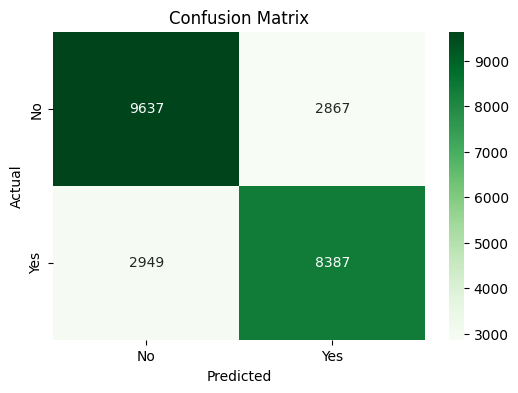

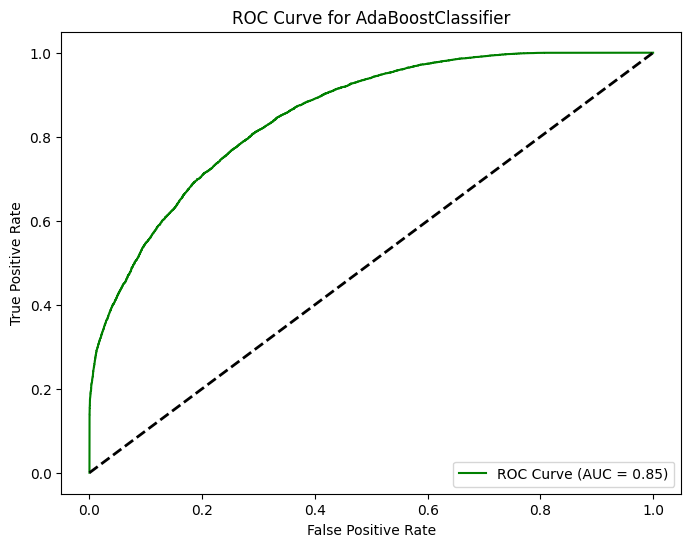

In [ ]:
# Part 1: Store Metrics, Plot ROC Curve, and Confusion Matrix
y_predict_test = best_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_predict_test)

# Confusion Matrix
ConfMatrix = confusion_matrix(y_test, y_predict_test)

# Compute Precision, Recall, F-score, and Support
prf = precision_recall_fscore_support(y_test, y_predict_test, average='binary')

# Calculate predicted probabilities for ROC curve
proba = best_model.predict_proba(x_test)[:, 1]

# ROC curve and AUC
False_Positive_Rate, True_Positive_Rate, _ = roc_curve(y_test, proba)
roc_auc = auc(False_Positive_Rate, True_Positive_Rate)

# Store metrics and ROC data
metrics_best_model = {
    'accuracy': accuracy,
    'precision': prf[0],
    'recall': prf[1],
    'f_score': prf[2],
    'roc_auc': roc_auc,
    'fpr': False_Positive_Rate,  # Store fpr for Part 3
    'tpr': True_Positive_Rate   # Store tpr for Part 3
}

# Print metrics
print(f"Metrics for {best_model.__class__.__name__}:")
print(f"Accuracy: {accuracy:.6f}")
print(f"Precision: {prf[0]:.6f}")
print(f"Recall: {prf[1]:.6f}")
print(f"F-score: {prf[2]:.6f}")
print(f"AUC: {roc_auc:.6f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(ConfMatrix, annot=True, fmt='d', cmap='Greens', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(False_Positive_Rate, True_Positive_Rate, color='green', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {best_model.__class__.__name__}')
plt.legend(loc="lower right")
plt.show()


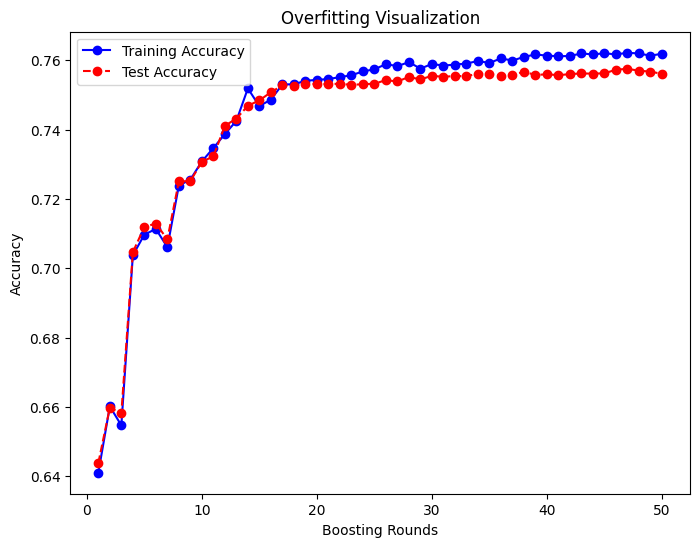

In [ ]:
# Initialize lists to store accuracy values
train_accuracy = []
test_accuracy = []

# Loop through each boosting round and calculate accuracy
for y_train_pred, y_test_pred in zip(best_model.staged_predict(x_train), best_model.staged_predict(x_test)):
    # Append accuracy at each boosting stage
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Plot accuracy over boosting rounds
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label="Training Accuracy", color='blue', linestyle='-', marker='o')
plt.plot(range(1, len(test_accuracy) + 1), test_accuracy, label="Test Accuracy", color='red', linestyle='--', marker='o')

# Adding labels and title
plt.xlabel('Boosting Rounds')
plt.ylabel('Accuracy')
plt.title('Overfitting Visualization')
plt.legend()
plt.show()


# **Building KNN and Naive Bayes classifiers**

In [ ]:
# Define a list of classifiers to train and test
classifiers = [
    KNeighborsClassifier(n_neighbors=5),
    GaussianNB(),
    ]

Confusion Matrix for KNeighborsClassifier:
[[8694 3810]
 [3861 7475]]


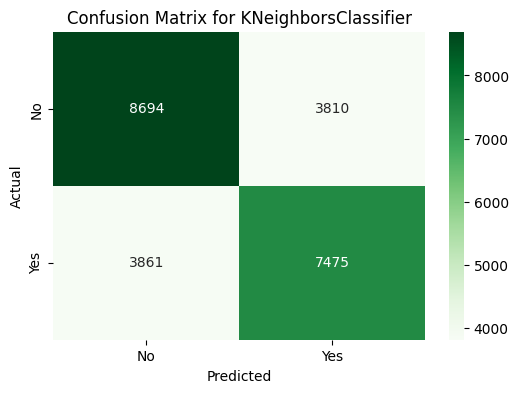

Metrics for KNeighborsClassifier:
Accuracy: 0.678230
Precision: 0.662384
Recall: 0.659404
F-score: 0.660890


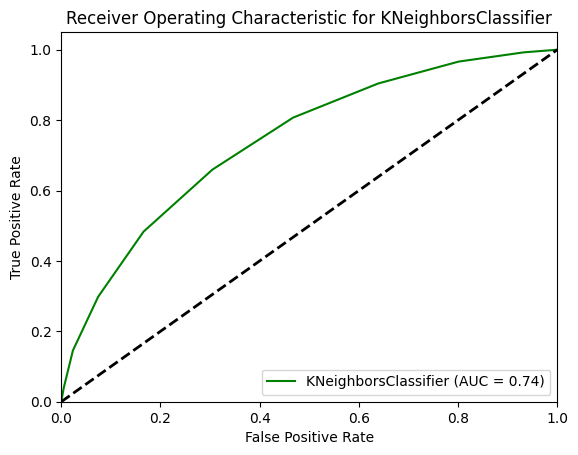

Confusion Matrix for GaussianNB:
[[8400 4104]
 [2862 8474]]


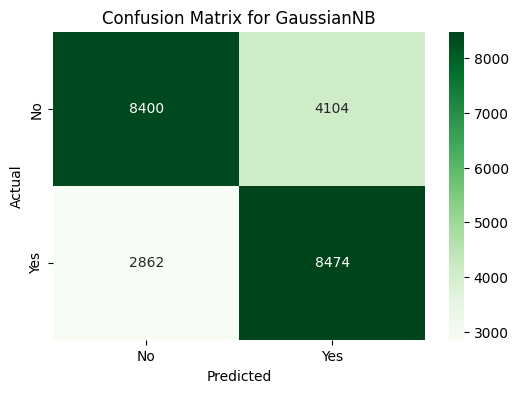

Metrics for GaussianNB:
Accuracy: 0.707802
Precision: 0.673716
Recall: 0.747530
F-score: 0.708706


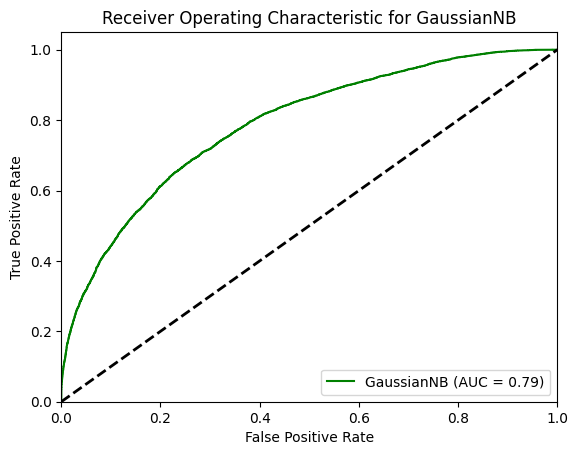

In [ ]:
param_grids = {
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7, 9]
    },
    'GaussianNB': {
'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
                    }
}

metrics_classifiers = {}  # Initialize a dictionary to store ROC data for Part 3

# Train and test each classifier
for clf in classifiers:
    clf_name = clf.__class__.__name__

    # Perform Grid Search
    grid_search = GridSearchCV(clf, param_grids[clf_name], cv=5, scoring='accuracy')
    grid_search.fit(x_train, y_train)

    # Get the best estimator after Grid Search
    best_clf = grid_search.best_estimator_

    # Make predictions using the best classifier
    y_pred = best_clf.predict(x_test)
    proba = best_clf.predict_proba(x_test)[:, 1]

    # Compute and display the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {clf_name}:")
    print(cm)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {clf_name}')
    plt.show()

    # Compute and display precision, recall, F-score, and support
    prf = precision_recall_fscore_support(y_test, y_pred, average='binary')
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f"Metrics for {clf_name}:")
    print(f"Accuracy: {accuracy:.6f}")  # Print accuracy
    print(f"Precision: {prf[0]:.6f}")
    print(f"Recall: {prf[1]:.6f}")
    print(f"F-score: {prf[2]:.6f}")

    # Compute and plot the ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='green', label=f"{clf_name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {clf_name}')
    plt.legend(loc="lower right")
    plt.show()

    # Store ROC data for Part 3
    metrics_classifiers[clf_name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}


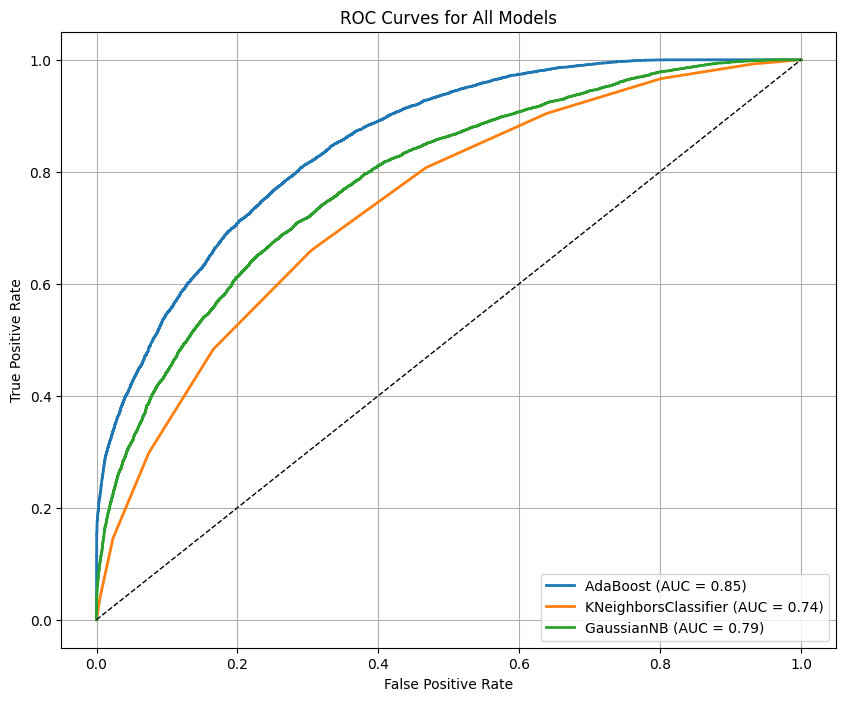

In [ ]:

# Part 3: Visualize Combined ROC Curves
plt.figure(figsize=(10, 8))

# Plot ROC for AdaBoost (from Part 1)
plt.plot(metrics_best_model['fpr'], metrics_best_model['tpr'],
         label=f"AdaBoost (AUC = {metrics_best_model['roc_auc']:.2f})", linewidth=2)

# Plot ROC for Classifiers (from Part 2)
for clf_name, roc_data in metrics_classifiers.items():
    plt.plot(roc_data['fpr'], roc_data['tpr'],
             label=f"{clf_name} (AUC = {roc_data['roc_auc']:.2f})", linewidth=2)

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc="lower right")
plt.grid()
plt.show()
